In [1]:
import dask.dataframe as dd 
import dask.array as da

# Read a CSV file named "my_data.csv"

df = dd.read_csv("NYPD_Complaint_Data_Historic.csv", dtype={'ADDR_PCT_CD': 'float64',
       'HADEVELOPT': 'object',
       'JURISDICTION_CODE': 'float64',
       'PARKS_NM': 'object',
       'PD_CD': 'float64',
       'STATION_NAME': 'object', 'HOUSING_PSA': 'object',
       'X_COORD_CD': 'float64',
       'Y_COORD_CD': 'float64'} )

# You can then perform operations on the Dask DataFrame like filtering, aggregation etc.

print(df.head())

   CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0   700381962   05/28/2015     15:00:00          NaN          NaN   
1   642234217   10/28/2013     13:50:00   10/28/2013     13:50:00   
2   242465164   05/09/2012     20:50:00   05/09/2012     21:00:00   
3   927207428   01/03/2014     13:30:00   01/03/2014     13:35:00   
4   492142357   04/13/2016     00:00:00          NaN          NaN   

   ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  ...  \
0         46.0  06/01/2015    578                   HARRASSMENT 2  638.0  ...   
1        120.0  10/28/2013    351  CRIMINAL MISCHIEF & RELATED OF  259.0  ...   
2         24.0  05/09/2012    236               DANGEROUS WEAPONS  782.0  ...   
3        108.0  01/03/2014    109                   GRAND LARCENY  409.0  ...   
4         40.0  04/13/2016    351  CRIMINAL MISCHIEF & RELATED OF  258.0  ...   

  SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
0        M              NaN  40.845868 -73.91

In [2]:
df.dtypes

CMPLNT_NUM                     int64
CMPLNT_FR_DT         string[pyarrow]
CMPLNT_FR_TM         string[pyarrow]
CMPLNT_TO_DT         string[pyarrow]
CMPLNT_TO_TM         string[pyarrow]
ADDR_PCT_CD                  float64
RPT_DT               string[pyarrow]
KY_CD                          int64
OFNS_DESC            string[pyarrow]
PD_CD                        float64
PD_DESC              string[pyarrow]
CRM_ATPT_CPTD_CD     string[pyarrow]
LAW_CAT_CD           string[pyarrow]
BORO_NM              string[pyarrow]
LOC_OF_OCCUR_DESC    string[pyarrow]
PREM_TYP_DESC        string[pyarrow]
JURIS_DESC           string[pyarrow]
JURISDICTION_CODE            float64
PARKS_NM             string[pyarrow]
HADEVELOPT           string[pyarrow]
HOUSING_PSA          string[pyarrow]
X_COORD_CD                   float64
Y_COORD_CD                   float64
SUSP_AGE_GROUP       string[pyarrow]
SUSP_RACE            string[pyarrow]
SUSP_SEX             string[pyarrow]
TRANSIT_DISTRICT             float64
L

In [3]:
len(df.columns)

35

In [4]:
df.describe().compute()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,6.983207e+06,6.981041e+06,6.983207e+06,6.977342e+06,6.977342e+06,6.959143e+06,6.959143e+06,157084.000000,6.959143e+06,6.959143e+06
mean,5.500768e+08,6.327224e+01,2.957909e+02,4.148457e+02,7.304343e-01,1.004796e+06,2.070544e+05,13.598400,4.073495e+01,-7.392583e+01
std,2.597838e+08,3.451961e+01,1.499370e+02,2.180586e+02,6.752324e+00,2.174732e+04,3.153994e+04,12.471429,8.647664e-02,7.842862e-02
min,1.000001e+08,-9.900000e+01,1.010000e+02,1.000000e+02,0.000000e+00,1.110000e+02,1.110000e+02,1.000000,4.011271e+01,-7.751921e+01
25%,3.271422e+08,4.000000e+01,1.180000e+02,2.580000e+02,0.000000e+00,9.924020e+05,1.857320e+05,3.000000,4.067640e+01,-7.397058e+01
50%,5.520617e+08,6.600000e+01,3.410000e+02,3.970000e+02,0.000000e+00,1.005159e+06,2.085790e+05,11.000000,4.073918e+01,-7.392451e+01
75%,7.773998e+08,9.400000e+01,3.510000e+02,6.380000e+02,0.000000e+00,1.016882e+06,2.367860e+05,30.000000,4.081657e+01,-7.388216e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067298e+06,7.250292e+06,34.000000,5.965727e+01,-7.368479e+01


In [5]:
df = df.drop(["X_COORD_CD", "JURISDICTION_CODE","CMPLNT_TO_DT", "CMPLNT_TO_TM", "RPT_DT", "PARKS_NM", "HADEVELOPT",
             "HOUSING_PSA", "Y_COORD_CD", "SUSP_AGE_GROUP", "JURISDICTION_CODE", "X_COORD_CD", "SUSP_RACE", "LOC_OF_OCCUR_DESC",
             "SUSP_SEX", "TRANSIT_DISTRICT", "PATROL_BORO", "STATION_NAME", "VIC_AGE_GROUP", "VIC_RACE", "VIC_SEX", "PD_CD", "PD_DESC", "JURIS_DESC"], axis = 1)
df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon
npartitions=34,,,,,,,,,,,,,
,int64,string,string,float64,int64,string,string,string,string,string,float64,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
#Rename these columns
df1 = df.rename(columns={'CMPLNT_NUM': 'COMPLAINT_ID', 'CMPLNT_FR_DT': 'Start_Date', 'CMPLNT_FR_TM': 'Start_Time', 'KY_CD': 'Offence_Code', 'OFNS_DESC': 'Offence_Type',
      'LAW_CAT_CD': 'Offence_Level', 'BORO_NM': 'Borough', 'ADDR_PCT_CD': 'Neighbourhood', 'CRM_ATPT_CPTD_CD': 'Crime Attempt Status', 'PREM_TYP_DESC': 'Place of Crime'})
df1

,COMPLAINT_ID,Start_Date,Start_Time,Neighbourhood,Offence_Code,Offence_Type,Crime Attempt Status,Offence_Level,Borough,Place of Crime,Latitude,Longitude,Lat_Lon
npartitions=34,,,,,,,,,,,,,
,int64,string,string,float64,int64,string,string,string,string,string,float64,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
#Getting the Number of Null values of each columns
df1.isna().sum(axis=0).compute()

COMPLAINT_ID                0
Start_Date                655
Start_Time                 48
Neighbourhood            2166
Offence_Code                0
Offence_Type            18825
Crime Attempt Status        7
Offence_Level               0
Borough                 10894
Place of Crime          39732
Latitude                24064
Longitude               24064
Lat_Lon                 24064
dtype: int64

In [8]:
df1 = df1.dropna(subset=['Latitude','Start_Date', 'Start_Time', 'Offence_Type', 'Borough', 'Crime Attempt Status', 'Place of Crime', 'Neighbourhood',
                        'Longitude', 'Lat_Lon'])
df1

,COMPLAINT_ID,Start_Date,Start_Time,Neighbourhood,Offence_Code,Offence_Type,Crime Attempt Status,Offence_Level,Borough,Place of Crime,Latitude,Longitude,Lat_Lon
npartitions=34,,,,,,,,,,,,,
,int64,string,string,float64,int64,string,string,string,string,string,float64,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
df1.isna().sum(axis=0).compute()

COMPLAINT_ID            0
Start_Date              0
Start_Time              0
Neighbourhood           0
Offence_Code            0
Offence_Type            0
Crime Attempt Status    0
Offence_Level           0
Borough                 0
Place of Crime          0
Latitude                0
Longitude               0
Lat_Lon                 0
dtype: int64

In [10]:
import pandas as pd
df1['Start_Date'] = df1['Start_Date'].map_partitions(pd.to_datetime,format='%d/%m/%Y',meta = ('Start_Date','datetime64[ns]'))
df1

,COMPLAINT_ID,Start_Date,Start_Time,Neighbourhood,Offence_Code,Offence_Type,Crime Attempt Status,Offence_Level,Borough,Place of Crime,Latitude,Longitude,Lat_Lon
npartitions=34,,,,,,,,,,,,,
,int64,datetime64[ns],string,float64,int64,string,string,string,string,string,float64,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [11]:
#Counting number of offense types
group_by_offense_types = df1.groupby(['Offence_Type'])['COMPLAINT_ID'].count().compute()
group_by_offense_types_df = group_by_offense_types.to_frame()
group_by_offense_types_df_top_10 = group_by_offense_types_df.sort_values(by='COMPLAINT_ID', ascending=False).head(10)
group_by_offense_types_df_top_10

,COMPLAINT_ID
Offence_Type,
PETIT LARCENY,1154355
HARRASSMENT 2,874001
ASSAULT 3 & RELATED OFFENSES,726556
CRIMINAL MISCHIEF & RELATED OF,694607
GRAND LARCENY,599754
DANGEROUS DRUGS,414380
OFF. AGNST PUB ORD SENSBLTY &,364833
FELONY ASSAULT,264261
ROBBERY,252061


<Figure size 1000x800 with 0 Axes>

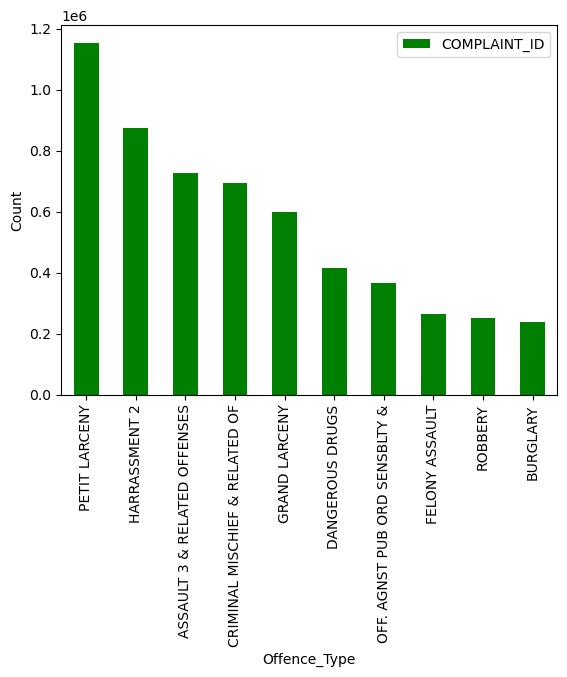

In [12]:
#Plotting a bar plot using matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,8))
group_by_offense_types_df_top_10.plot(kind='bar', color = 'green')
plt.xlabel('Offence_Type')
plt.ylabel('Count')
plt.show()

In [13]:
#Counting number of offense levels
group_by_offense_levels = df1.groupby(['Offence_Level'])['COMPLAINT_ID'].count().compute()
group_by_offense_levels_df = group_by_offense_levels.to_frame()
group_by_offense_levels_df_desc = group_by_offense_levels_df.sort_values(by='COMPLAINT_ID', ascending = False).head(3)
group_by_offense_levels_df_desc

,COMPLAINT_ID
Offence_Level,
MISDEMEANOR,3885471
FELONY,2122721
VIOLATION,888156


<Figure size 600x400 with 0 Axes>

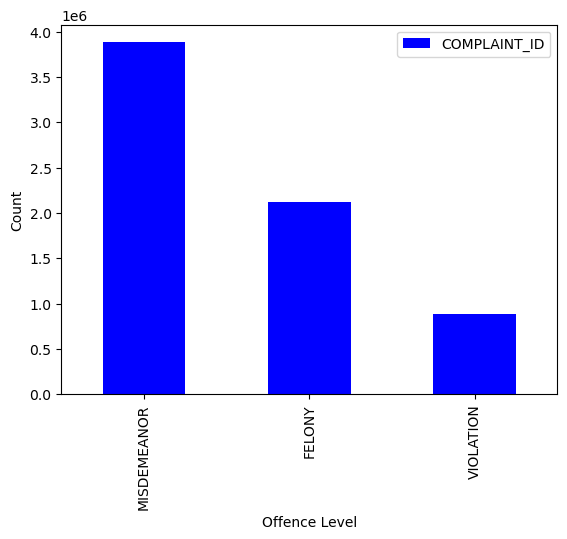

In [14]:
plt.figure(figsize=(6,4))
group_by_offense_levels_df_desc.plot(kind='bar', color = 'blue')
plt.xlabel('Offence Level')
plt.ylabel('Count')
plt.show()

In [15]:
#Converting staes to datetime
df1['Start_Date'] = dd.to_datetime(df1['Start_Date'], format=("%d/%m/%Y"), errors='coerce')
df1

,COMPLAINT_ID,Start_Date,Start_Time,Neighbourhood,Offence_Code,Offence_Type,Crime Attempt Status,Offence_Level,Borough,Place of Crime,Latitude,Longitude,Lat_Lon
npartitions=34,,,,,,,,,,,,,
,int64,datetime64[ns],string,float64,int64,string,string,string,string,string,float64,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [16]:
df1['Year'] = df1['Start_Date'].dt.year
df1

,COMPLAINT_ID,Start_Date,Start_Time,Neighbourhood,Offence_Code,Offence_Type,Crime Attempt Status,Offence_Level,Borough,Place of Crime,Latitude,Longitude,Lat_Lon,Year
npartitions=34,,,,,,,,,,,,,,
,int64,datetime64[ns],string,float64,int64,string,string,string,string,string,float64,float64,string,int32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [17]:
#Counting number of crimes registered per borough
crimes_per_borough = df1.groupby(['Borough'])['COMPLAINT_ID'].count().compute()
crimes_per_borough_df = crimes_per_borough.to_frame()
crimes_per_borough_df_desc = crimes_per_borough_df.sort_values(by='COMPLAINT_ID', ascending = False)
crimes_per_borough_df_desc

,COMPLAINT_ID
Borough,
BROOKLYN,2055229
MANHATTAN,1655394
BRONX,1496617
QUEENS,1365065
STATEN ISLAND,324043


<Figure size 1000x800 with 0 Axes>

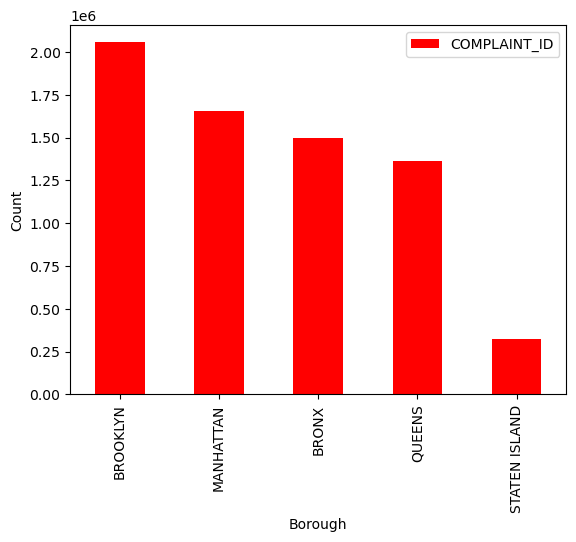

In [18]:
plt.figure(figsize=(10,8))
crimes_per_borough_df_desc.plot(kind='bar', color = 'red')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

In [19]:
pip install dask folium

Note: you may need to restart the kernel to use updated packages.


In [19]:
df_lat_lon = df1[['Latitude', 'Longitude']]
df_lat_lon_computed = df_lat_lon.compute()
print(df_lat_lon_computed)

         Latitude  Longitude
0       40.845868 -73.915888
1       40.627061 -74.077149
2       40.800966 -73.969047
3       40.745242 -73.894253
4       40.810352 -73.924942
...           ...        ...
196787  40.741889 -73.859886
196788  40.878054 -73.863244
196789  40.672202 -73.983786
196790  40.785050 -73.856852
196792  40.814612 -73.903637

[6896348 rows x 2 columns]


In [21]:
middle_lat = df_lat_lon_computed.median()
middle_lat

Latitude     40.731715
Longitude   -73.927289
dtype: float64

In [20]:
df1['Neighbourhood'] = df1['Neighbourhood'].astype(str)

# Perform aggregation: calculate mean Latitude, Longitude, and count complaints
aggregated_df = df1.groupby('Neighbourhood').agg({'Latitude': 'mean','Longitude': 'mean','COMPLAINT_ID': 'count'})

# Compute the result to bring it into memory
aggregated_df_computed = aggregated_df.compute()

aggregated_df_computed

,Latitude,Longitude,COMPLAINT_ID
Neighbourhood,,,
66.0,40.633664,-73.985286,65976
5.0,40.718817,-73.996104,61971
110.0,40.741942,-73.870156,94031
28.0,40.804712,-73.950811,73964
103.0,40.703459,-73.791932,107030
...,...,...,...
106.0,40.676239,-73.829330,84225
20.0,40.778943,-73.980870,56713
78.0,40.674467,-73.980236,50127


In [21]:
import folium
from folium.plugins import HeatMap

# Initialize the Folium map (centered at a typical NYC coordinate)
curr_map = folium.Map(location=[40.731715, -73.927289], zoom_start=11)

# Prepare the data for the heatmap (latitude, longitude, and weight as complaint count)
locations = aggregated_df_computed[['Latitude', 'Longitude', 'COMPLAINT_ID']].values.tolist()

# Create a HeatMap layer with the locations and weights
heatmap = HeatMap(locations, 
                  radius=13,  # Radius of each heatmap point
                  max_zoom=13,  # Maximum zoom level
                  min_opacity=0.2)

# Add the HeatMap to the map
curr_map.add_child(heatmap)

# Display the map
curr_map

In [24]:
# Add individual points as markers (optional)
for _, row in aggregated_df_computed.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=13,
        color='blue',  # Color of the marker
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(curr_map)

In [25]:
curr_map.save('heatmap.html')

In [22]:
df2 = df1[['Borough']]
df2           

,Borough
npartitions=34,
,string
,...
...,...
,...
,...


In [23]:
borough_area_mapping = {
    'MANHATTAN': '69.5',
    'BROOKLYN': '42.47',
    'QUEENS': '280.0',
    'BRONX': '22.82',
    'STATEN ISLAND': '58.69'
}

# Define a function that maps borough to area
def map_borough_to_area(borough, borough_area_mapping):
    return borough_area_mapping.get(borough, 'Unknown')  # Default to 'Unknown' if borough is not found

# Apply the function to the 'borough' column and create a new 'Area' column
df2['Area'] = df2['Borough'].apply(map_borough_to_area, args=(borough_area_mapping,), meta=('x', 'object'))

# Check the result
df2.head()

# Compute the Dask DataFrame to get the result in a Pandas DataFrame
df_computed = df2.compute()

# View the resulting Pandas DataFrame
df_computed.head()

,Borough,Area
0,BRONX,22.82
1,STATEN ISLAND,58.69
2,MANHATTAN,69.5
3,QUEENS,280.0
4,BRONX,22.82


In [24]:
crimes_per_borough_df_desc

,COMPLAINT_ID
Borough,
BROOKLYN,2055229
MANHATTAN,1655394
BRONX,1496617
QUEENS,1365065
STATEN ISLAND,324043


In [25]:
merge_df = dd.merge(df_computed, crimes_per_borough_df_desc, on = 'Borough', how = 'inner')
merge_df_computed = merge_df.compute()
merge_df_computed

,Borough,Area,COMPLAINT_ID
0,BRONX,22.82,1496617
1,BROOKLYN,42.47,2055229
2,BROOKLYN,42.47,2055229
3,BROOKLYN,42.47,2055229
4,QUEENS,280.0,1365065
...,...,...,...
6896343,BRONX,22.82,1496617
6896344,BROOKLYN,42.47,2055229
6896345,MANHATTAN,69.5,1655394
6896346,MANHATTAN,69.5,1655394


In [26]:
merge_df_computed['Area'] = merge_df_computed['Area'].astype(float)
merge_df_computed['crime_density'] = merge_df_computed['COMPLAINT_ID']/ merge_df_computed['Area']
merge_df_computed

,Borough,Area,COMPLAINT_ID,crime_density
0,BRONX,22.82,1496617,65583.567046
1,BROOKLYN,42.47,2055229,48392.488816
2,BROOKLYN,42.47,2055229,48392.488816
3,BROOKLYN,42.47,2055229,48392.488816
4,QUEENS,280.00,1365065,4875.232143
...,...,...,...,...
6896343,BRONX,22.82,1496617,65583.567046
6896344,BROOKLYN,42.47,2055229,48392.488816
6896345,MANHATTAN,69.50,1655394,23818.618705
6896346,MANHATTAN,69.50,1655394,23818.618705


In [27]:
group_by_crime_density = merge_df_computed.groupby(['Borough'])['crime_density'].mean()
group_by_crime_density

Borough
BRONX            65583.567046
BROOKLYN         48392.488816
MANHATTAN        23818.618705
QUEENS            4875.232143
STATEN ISLAND     5521.264270
Name: crime_density, dtype: float64

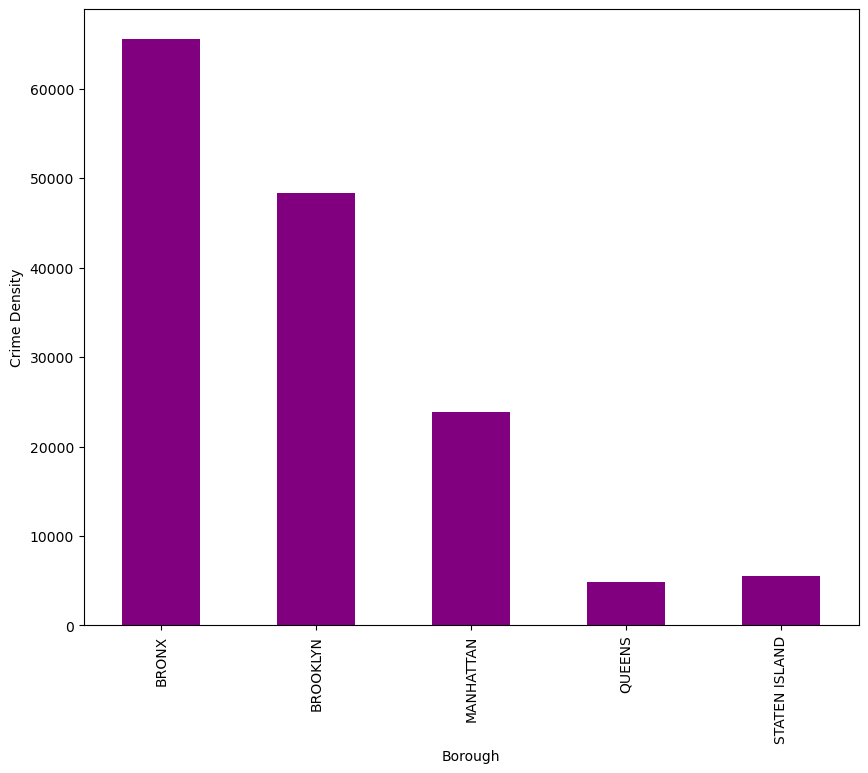

In [28]:
plt.figure(figsize=(10,8))
group_by_crime_density.plot(kind = 'bar', color = 'purple')
plt.xlabel('Borough')
plt.ylabel('Crime Density')
plt.show()

In [29]:
boroughs_population = {'BROOKLYN' : '2629150',
                       'BRONX': '1455720',
                       'QUEENS': '2333054',
                       'MANHATTAN': '1643734',
                       'STATEN ISLAND': '476015'}
df3 = df1[['Borough']]
# Define a function that maps borough to population
def map_borough_to_population(borough):
    return boroughs_population.get(borough, 'Unknown')  # Default to 'Unknown' if borough is not found

# Apply the function to the 'borough' column and create a new 'population' column
df3['Population'] = df3['Borough'].apply(map_borough_to_population, meta=('x', 'object'))

# Compute the Dask DataFrame to get the result in a Pandas DataFrame
df1_computed = df3.compute()

# View the resulting Pandas DataFrame
df1_computed.head()

,Borough,Population
0,BRONX,1455720
1,STATEN ISLAND,476015
2,MANHATTAN,1643734
3,QUEENS,2333054
4,BRONX,1455720


In [30]:
crimes_per_borough_df_desc

,COMPLAINT_ID
Borough,
BROOKLYN,2055229
MANHATTAN,1655394
BRONX,1496617
QUEENS,1365065
STATEN ISLAND,324043


In [31]:
merged_df2= dd.merge(df1_computed, crimes_per_borough_df_desc, on = 'Borough', how = 'inner')
merged_df2_computed = merged_df2.compute()
merged_df2_computed

,Borough,Population,COMPLAINT_ID
0,BRONX,1455720,1496617
1,BROOKLYN,2629150,2055229
2,BROOKLYN,2629150,2055229
3,BROOKLYN,2629150,2055229
4,QUEENS,2333054,1365065
...,...,...,...
6896343,BRONX,1455720,1496617
6896344,BROOKLYN,2629150,2055229
6896345,MANHATTAN,1643734,1655394
6896346,MANHATTAN,1643734,1655394


In [32]:
total_population = 8537673
total_area = 473.48
total_crimes = 6896348

In [34]:
merged_df2_computed['Population'] = merged_df2_computed['Population'].astype(int)
merged_df2_computed

,Borough,Population,COMPLAINT_ID
0,BRONX,1455720,1496617
1,BROOKLYN,2629150,2055229
2,BROOKLYN,2629150,2055229
3,BROOKLYN,2629150,2055229
4,QUEENS,2333054,1365065
...,...,...,...
6896343,BRONX,1455720,1496617
6896344,BROOKLYN,2629150,2055229
6896345,MANHATTAN,1643734,1655394
6896346,MANHATTAN,1643734,1655394


In [35]:
merged_df2_computed['Population_frac'] = merged_df2_computed['Population']/ total_population
merged_df2_computed

,Borough,Population,COMPLAINT_ID,Population_frac
0,BRONX,1455720,1496617,0.170505
1,BROOKLYN,2629150,2055229,0.307947
2,BROOKLYN,2629150,2055229,0.307947
3,BROOKLYN,2629150,2055229,0.307947
4,QUEENS,2333054,1365065,0.273266
...,...,...,...,...
6896343,BRONX,1455720,1496617,0.170505
6896344,BROOKLYN,2629150,2055229,0.307947
6896345,MANHATTAN,1643734,1655394,0.192527
6896346,MANHATTAN,1643734,1655394,0.192527


In [37]:
merged_df2_computed['Crime_frac'] = merged_df2_computed['COMPLAINT_ID']/ total_crimes
merged_df2_computed

,Borough,Population,COMPLAINT_ID,Population_frac,Crime_frac
0,BRONX,1455720,1496617,0.170505,0.217016
1,BROOKLYN,2629150,2055229,0.307947,0.298017
2,BROOKLYN,2629150,2055229,0.307947,0.298017
3,BROOKLYN,2629150,2055229,0.307947,0.298017
4,QUEENS,2333054,1365065,0.273266,0.197940
...,...,...,...,...,...
6896343,BRONX,1455720,1496617,0.170505,0.217016
6896344,BROOKLYN,2629150,2055229,0.307947,0.298017
6896345,MANHATTAN,1643734,1655394,0.192527,0.240039
6896346,MANHATTAN,1643734,1655394,0.192527,0.240039


In [40]:
group_by_borough = merged_df2_computed.groupby('Borough').agg({'Population': 'mean','COMPLAINT_ID': 'mean','Population_frac': 'mean', 'Crime_frac': 'mean'})
group_by_borough

,Population,COMPLAINT_ID,Population_frac,Crime_frac
Borough,,,,
BRONX,1455720.0,1496617.0,0.170505,0.217016
BROOKLYN,2629150.0,2055229.0,0.307947,0.298017
MANHATTAN,1643734.0,1655394.0,0.192527,0.240039
QUEENS,2333054.0,1365065.0,0.273266,0.197940
STATEN ISLAND,476015.0,324043.0,0.055755,0.046988


In [45]:
group_by_borough_frac = group_by_borough[['Population_frac', 'Crime_frac']]
group_by_borough_frac

,Population_frac,Crime_frac
Borough,,
BRONX,0.170505,0.217016
BROOKLYN,0.307947,0.298017
MANHATTAN,0.192527,0.240039
QUEENS,0.273266,0.197940
STATEN ISLAND,0.055755,0.046988


<Figure size 1000x600 with 0 Axes>

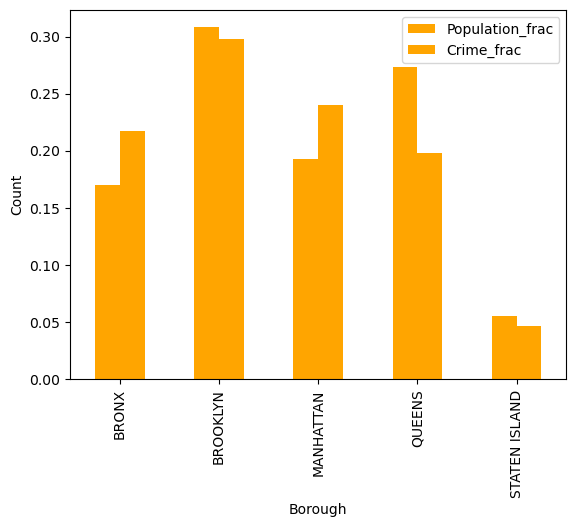

In [46]:
plt.figure(figsize=(10,6))
group_by_borough_frac.plot(kind = 'bar', color = 'orange')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()